In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

In [11]:
data = pd.read_csv("/content/sample_data/House_Rent_Dataset.csv")

In [12]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
print(f'Number of rows in the dataset: {data.shape[0]}')
print(f'Number of columns in the dataset: {data.shape[1]}')

Number of rows in the dataset: 4746
Number of columns in the dataset: 12


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [15]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [16]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [17]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

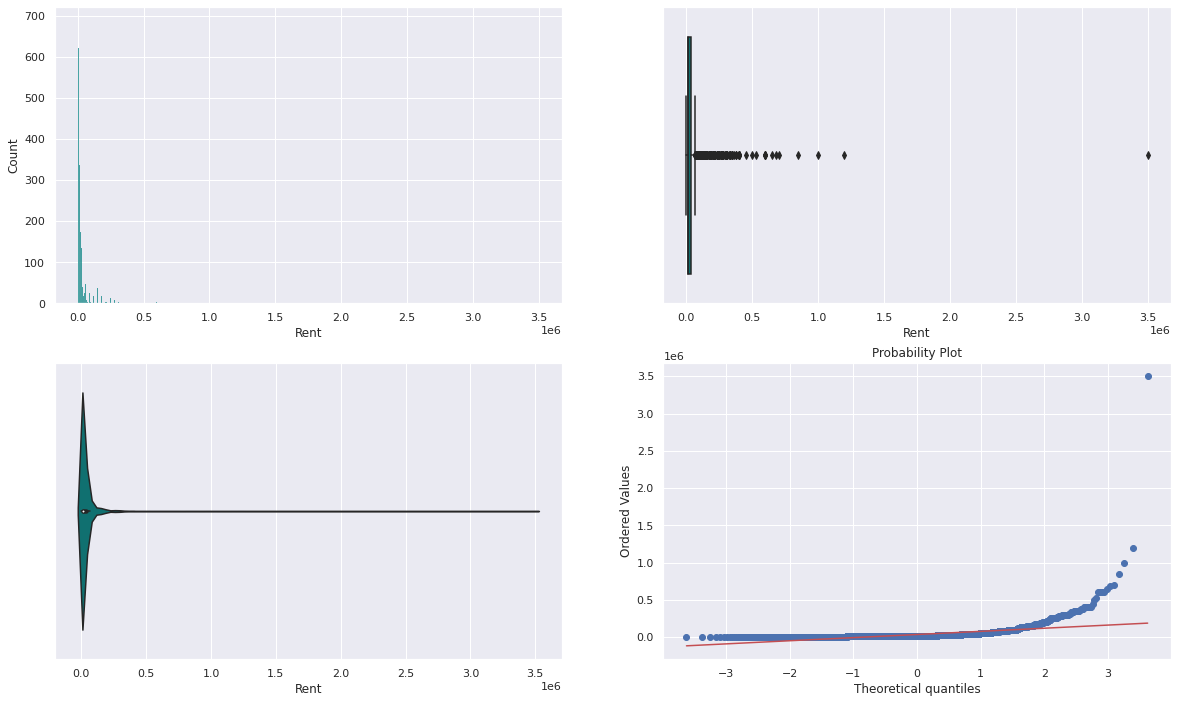

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Rent'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Rent'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Rent'], plot=pylab)
pylab.show()

In [20]:
max_rent = data['Rent'].max()
index_max_rent = data[data['Rent'] == max_rent].index
data = data.drop(index_max_rent)

bc_result = boxcox(data['Rent'])
boxcox_y = bc_result[0]
lam = bc_result[1]

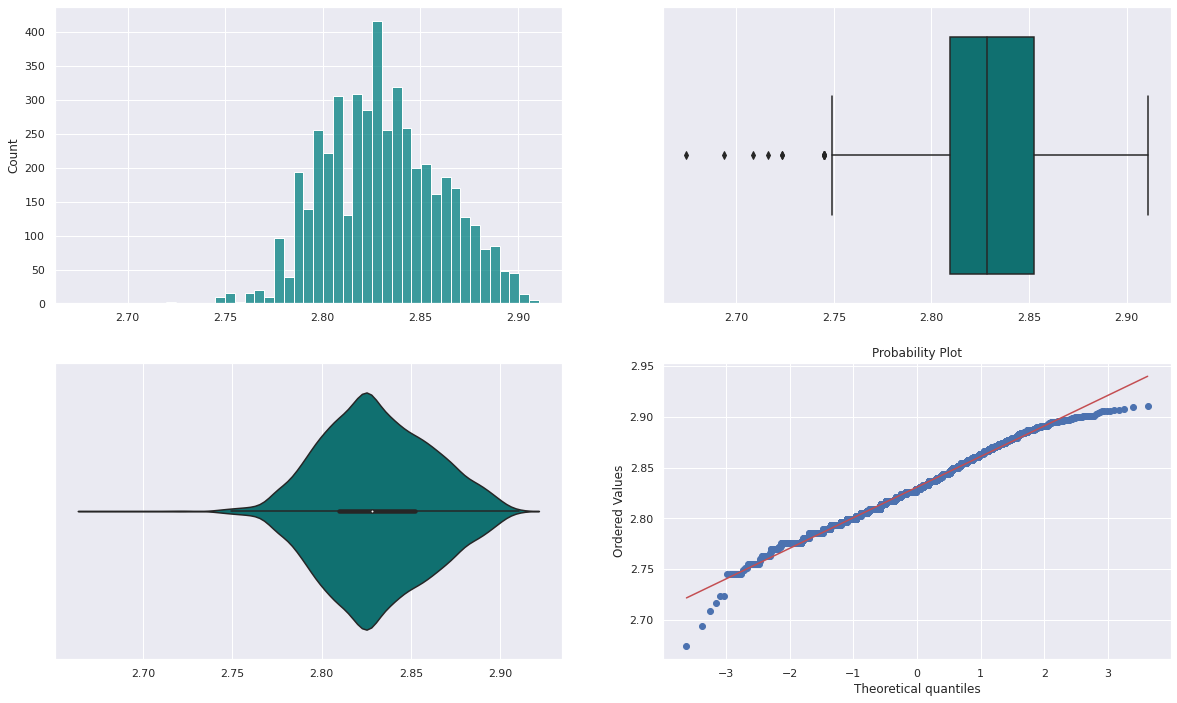

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = boxcox_y, color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = boxcox_y, ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = boxcox_y, ax= ax[1, 0], color= 'teal')
ax4 = probplot(boxcox_y, plot=pylab)
pylab.show()

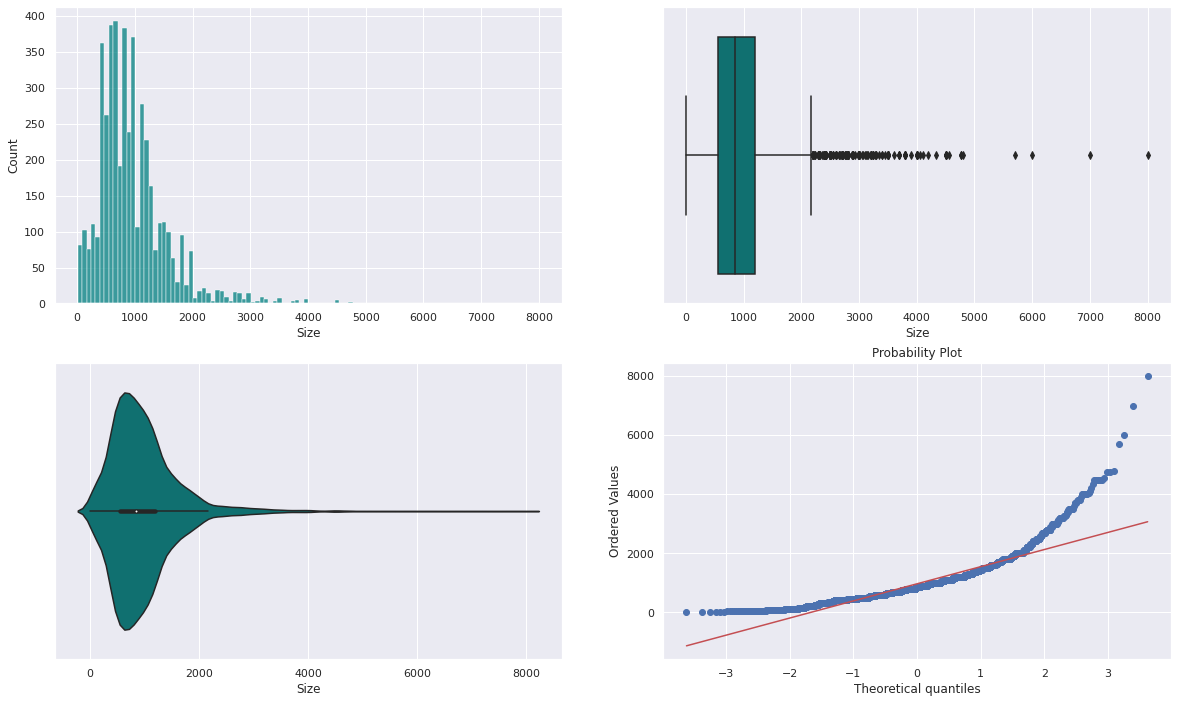

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

In [23]:
data['Size'] = boxcox(data['Size'])[0]

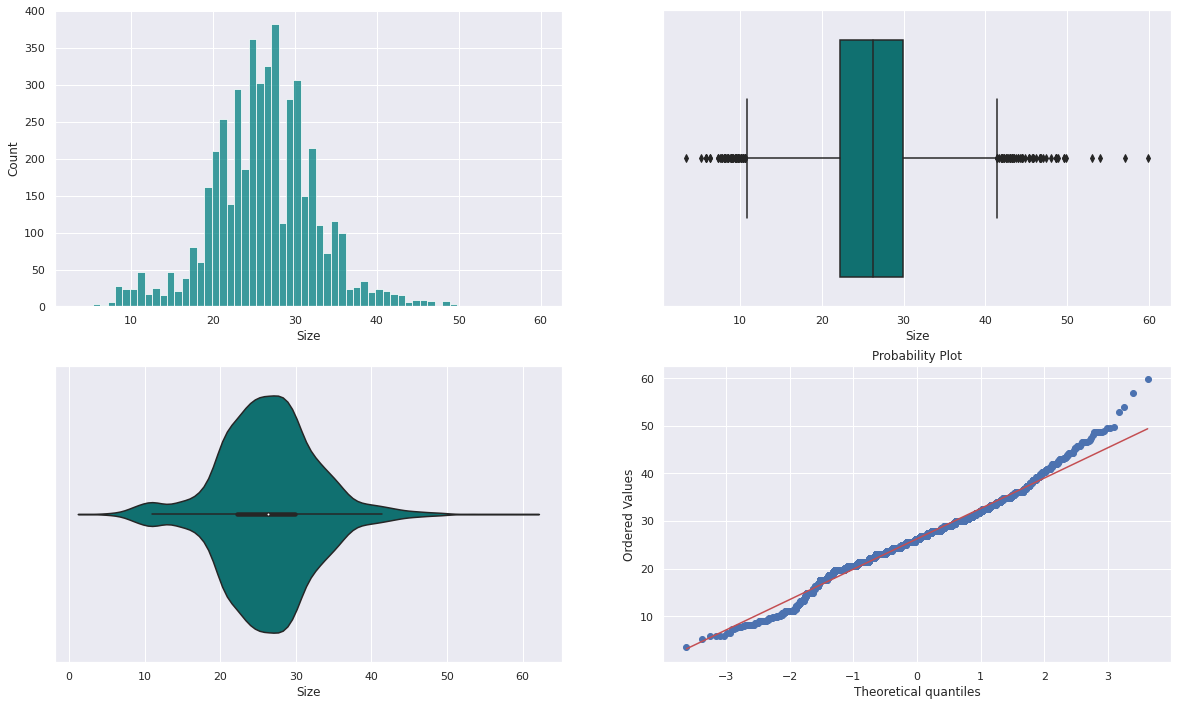

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

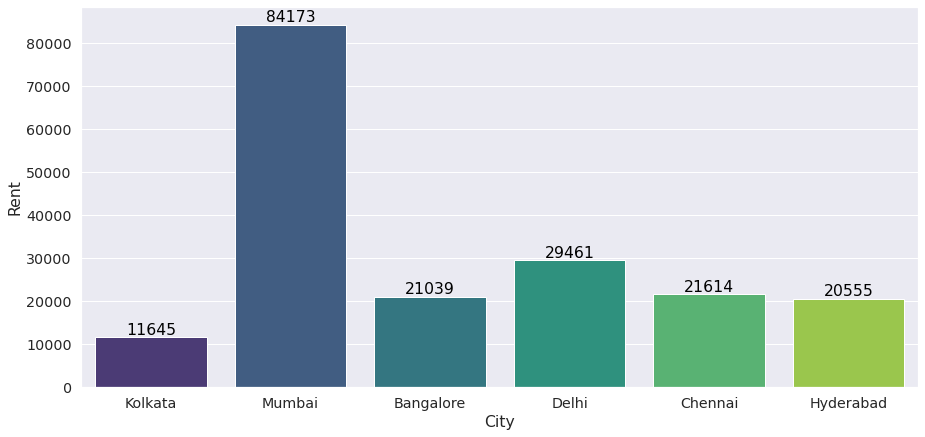

In [25]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

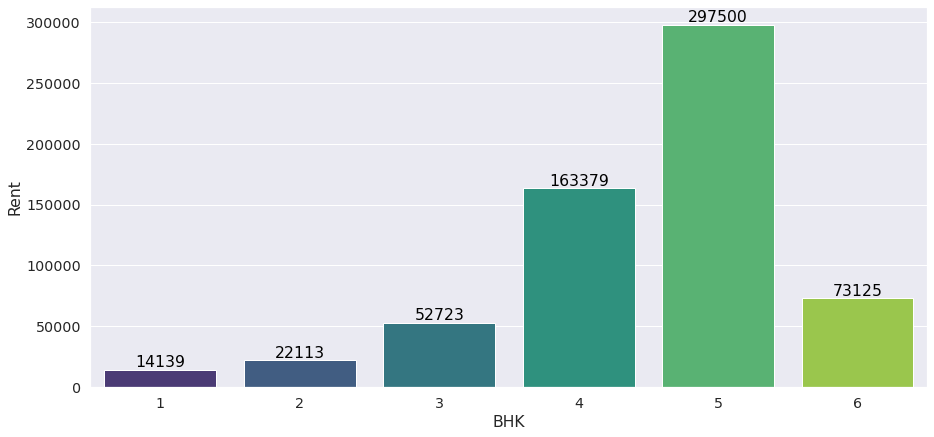

In [26]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['BHK'].sort_values(ascending=True), 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [27]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

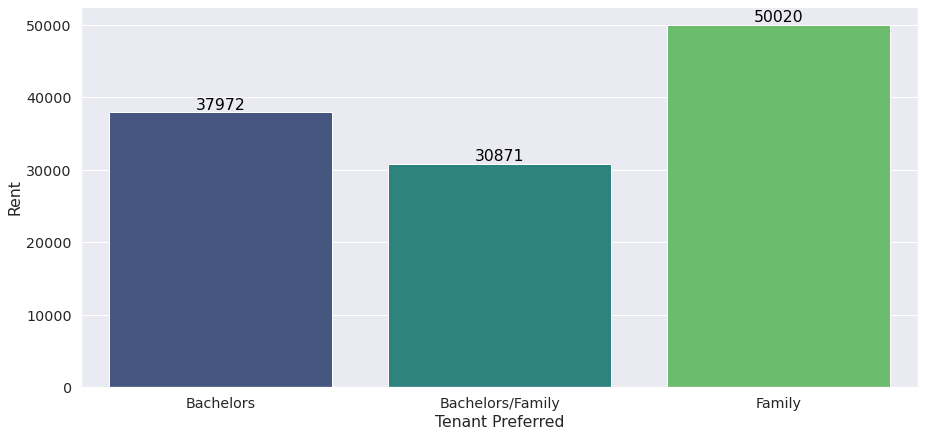

In [28]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Tenant Preferred'].sort_values(ascending=True), 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

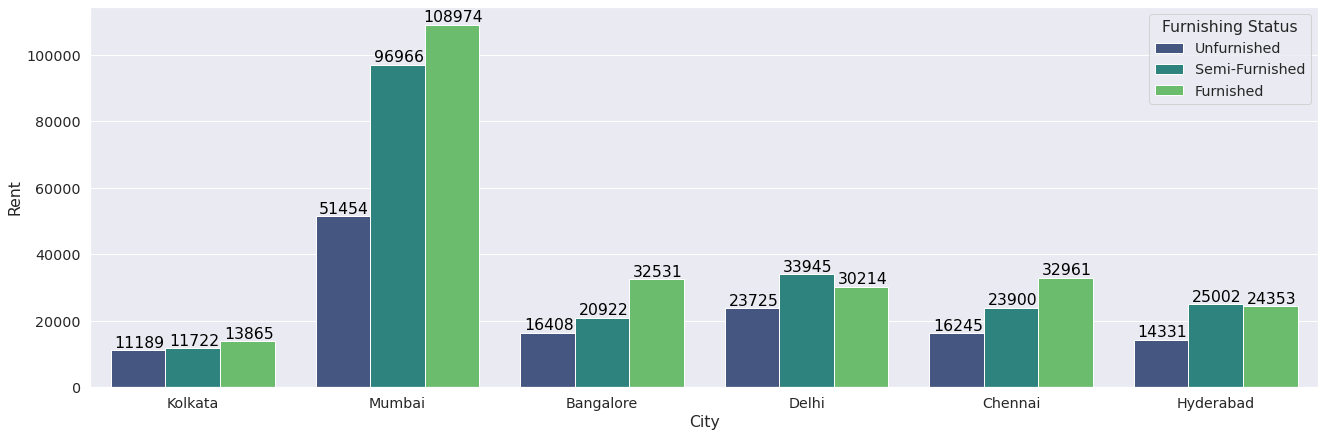

In [29]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Furnishing Status'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

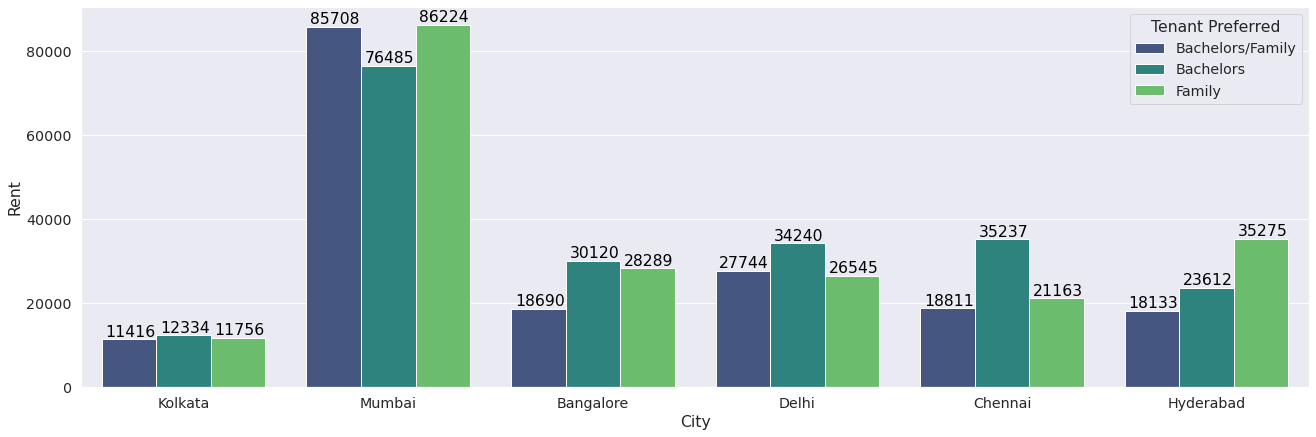

In [30]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Tenant Preferred'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [31]:
data = data[~data['Area Type'].str.contains("Built Area")]

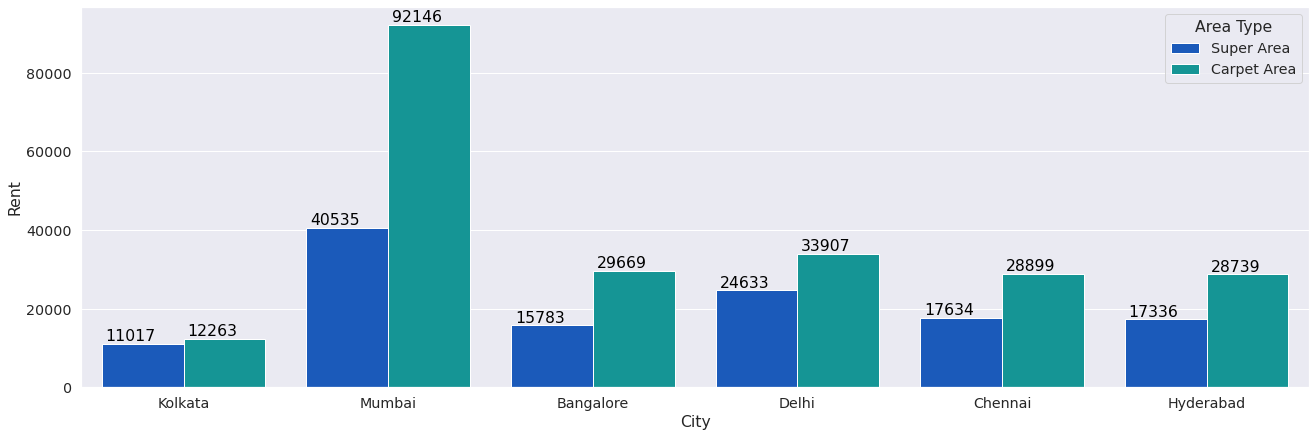

In [32]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Area Type'], 
                 palette='winter',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [33]:
# Cleaing Floor Feature
data = data.join(data['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
data['Floor Level'] = data.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)

data.drop('Floor', axis=1, inplace=True)
data = data.dropna()
data['Floor Level'] = data['Floor Level'].astype(int)
data['Total Floors'] = data['Total Floors'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [34]:
print(data['Point of Contact'].value_counts())
print()
print(data['Area Type'].value_counts())

Contact Owner      3210
Contact Agent      1527
Contact Builder       1
Name: Point of Contact, dtype: int64

Super Area     2444
Carpet Area    2294
Name: Area Type, dtype: int64


In [35]:
data = data[~data['Point of Contact'].str.contains("Contact Builder")]

In [36]:
data['month posted'] = data['Posted On'].dt.month
data['day posted'] = data['Posted On'].dt.day
data['day of week posted'] = data['Posted On'].dt.day_of_week
data['quarter poster'] = data['Posted On'].dt.quarter

data.drop('Posted On', axis = 1, inplace= True)

In [37]:
print(data.duplicated().sum())
data = data.drop_duplicates()

4


In [38]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [39]:
data = data.drop('Area Locality', axis= 1)

In [40]:
columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in columns:
    data = one_hot_encode(data, col)

In [41]:
data.head()


,BHK,Rent,Size,Bathroom,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,10000,28.972542,2,0,2,5,18,2,2,...,0,0,0,1,0,0,1,1,0,1
1,2,20000,25.691557,1,3,3,5,13,4,2,...,0,0,0,1,0,1,0,1,0,1
2,2,17000,27.952981,1,3,3,5,16,0,2,...,0,0,0,1,0,1,0,1,0,1
3,2,10000,25.691557,1,2,2,7,4,0,3,...,0,0,0,1,0,0,1,1,0,1
4,2,7500,26.289040,1,2,2,5,9,0,2,...,0,0,0,1,0,0,1,0,0,1


In [42]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
models = {
    
    'xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4)
}

In [48]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

[15:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost trained
lightgbm trained
gradient boosting trained
lasso trained
random forest trained
bayesian ridge trained
support vector trained
knn trained


In [49]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

[15:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [50]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

xgboost : 0.014
lightgbm : 0.014
gradient boosting : 0.014
lasso : 0.03
random forest : 0.014
bayesian ridge : 0.015
support vector : 0.043
knn : 0.016


In [51]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,support vector,lasso,knn,bayesian ridge,random forest,xgboost,gradient boosting,lightgbm
RMSE,0.043126,0.030371,0.0161,0.014513,0.014122,0.013721,0.0137,0.013639


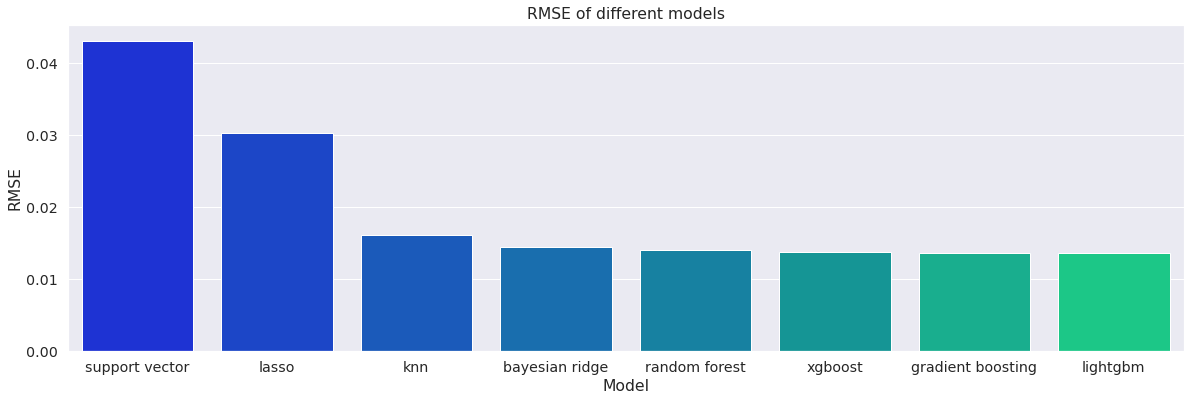

In [52]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

In [53]:
final_predictions = (
    0.20 * inv_boxcox(models['xgboost'].predict(X_test), lam) +
    0.20 * inv_boxcox(models['lightgbm'].predict(X_test), lam) + 
    0.20 * inv_boxcox(models['random forest'].predict(X_test), lam) + 
    0.20 * inv_boxcox(models['gradient boosting'].predict(X_test), lam)
)

In [54]:
print(f'RMSE: {np.sqrt(mean_squared_error(inv_boxcox(y_test, lam), final_predictions))}')
print(f'R-square: {r2_score(inv_boxcox(y_test, lam), final_predictions)}')

RMSE: 30649.412494644897
R-square: 0.7116719516485341


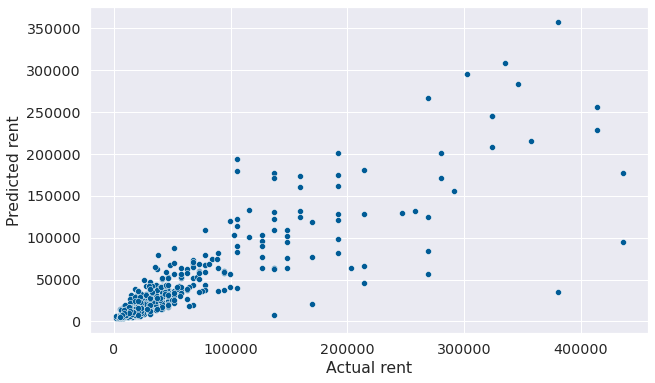

In [55]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= inv_boxcox(y_test, lam), y= final_predictions, color= '#005b96')
plt.xlabel('Actual rent')
plt.ylabel('Predicted rent')
plt.show()

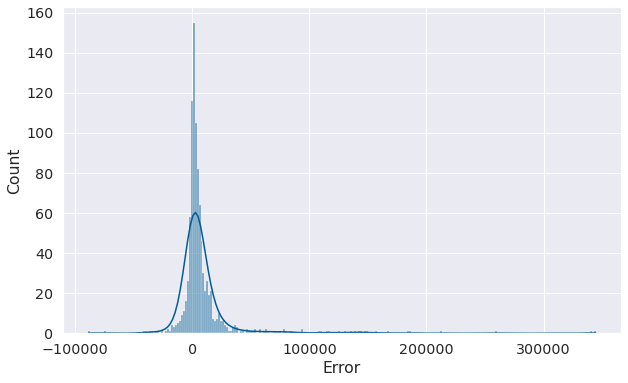

In [56]:
plt.figure(figsize = (10, 6))
sns.histplot(inv_boxcox(y_test, lam) - final_predictions, color = '#005b96', kde= True)
plt.xlabel('Error');
